In [51]:
import torch
import torchvision
import os
import sys
import time
import cv2
import numpy as np
import pytorch_grad_cam
import pickle
import json
%matplotlib inline
import matplotlib.pyplot as plt

In [54]:
def load_RGB(img_path):
    img = cv2.cvtColor(cv2.imread(img_path, cv2.IMREAD_UNCHANGED),cv2.COLOR_BGR2RGB)
    return img
def load_gray(img_path):
    return cv2.imread(img_path,cv2.IMREAD_UNCHANGED)
def get_images(dataset, video_index, image_index):
    
    video_name = str(video_index)
    if video_index <= 9:
        video_name = "0" + str(video_index)
    video_directory = os.path.join(dataset,video_name)
    image_directory = os.path.join(video_directory, str(image_index))
    mask = 255 * np.load(os.path.join(image_directory,"mask.npy"),allow_pickle = True)
    mask = mask.astype(np.uint8)
    final = load_RGB(os.path.join(image_directory,"final.jpg"))
    box = load_RGB(os.path.join(image_directory,"box.jpg"))
    garmin_directory = os.path.join(video_directory, "garmin")
    saliency_directory = os.path.join(video_directory, "saliency")
    #print(dataset, video_directory, image_directory, garmin_directory, saliency_directory)
    garmin_image = load_RGB(os.path.join(garmin_directory,str(image_index) + ".jpg"))
    saliency_image = cv2.cvtColor(cv2.imread(os.path.join(saliency_directory,str(image_index) + ".jpg"),cv2.IMREAD_UNCHANGED),cv2.COLOR_BGR2GRAY)
    #print(saliency_image.shape)
    #print(mask.shape)
    #print(mask.min(),mask.max())
    #mask = mask / mask.max()
    #print(mask.dtype)
    #mask = mask.astype(np.float32)
    #mask = saliency_image.astype(np.float32) / 255
    #mask = saliency_image.astype(np.float32)
    #print(saliency_image.max(),saliency_image.min())
    return final,box,mask,garmin_image,saliency_image
def show_images(images):
    d = len(images) // 2
    if len(images) % 2 == 1:
        d += 1
    fig = plt.figure(figsize = (40,40))
    cnt = 1
    for i in range(len(images)):
        #print(d,2,cnt)
        
        fig.add_subplot(d,2,cnt)
        cnt += 1
        img = images[i]
        print(img.shape)
        print(img.max(),img.min())
        if len(img.shape) == 2:
            plt.imshow(img,cmap = 'gray')
        else:
            plt.imshow(img)
    

In [74]:
def combine_images(images):
    new_images = []
    for im in images:
        print(im.max(),im.min(),im.dtype)
        if im.shape[0] == 540:
            new_im = cv2.resize(im,dsize = None,fx = 0.5, fy = 0.5)
            new_images.append(new_im)
        else:
            new_images.append(im)
    final_image = np.zeros((new_images[0].shape[0],5 * new_images[0].shape[1] + 250,3),dtype = np.uint8)
    final_image += 255
    cnt = 0
    (l,b) = new_images[0].shape[0], new_images[0].shape[1]
    for im in new_images:
        if len(im.shape) == 2:
            im = cv2.cvtColor(im,cv2.COLOR_GRAY2RGB)
        final_image[0:l,cnt * (b + 50) : (cnt + 1) * b + cnt * 50,:] = im
        cnt += 1
    return final_image
        
    
            
def generate_image(video_index,img_index):
    dataset_directory = "./../DREYEVE_DATA_OUTPUT/"
    final,box,mask,garmin_image,saliency_image = get_images(dataset_directory,video_index,img_index)
    final_image = combine_images([final,box,mask,garmin_image,saliency_image])
    #plt.imshow(final_image)
    return final_image
    
def save_RGB(path,img):
    cv2.imwrite(path,cv2.cvtColor(img,cv2.COLOR_RGB2BGR))
    


255 0 uint8
255 0 uint8
254 0 uint8
255 0 uint8
255 0 uint8
(270, 2650, 3)


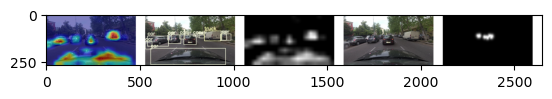

In [98]:
r = generate_image(11,990)
print(r.shape)
plt.imshow(r)


In [99]:
save_RGB("examples/sample2.jpg",r)


(1080, 1920, 3)
255 0
(1080, 1920, 3)
255 0
(540, 960, 3)
255 0
(540, 960, 3)
255 0


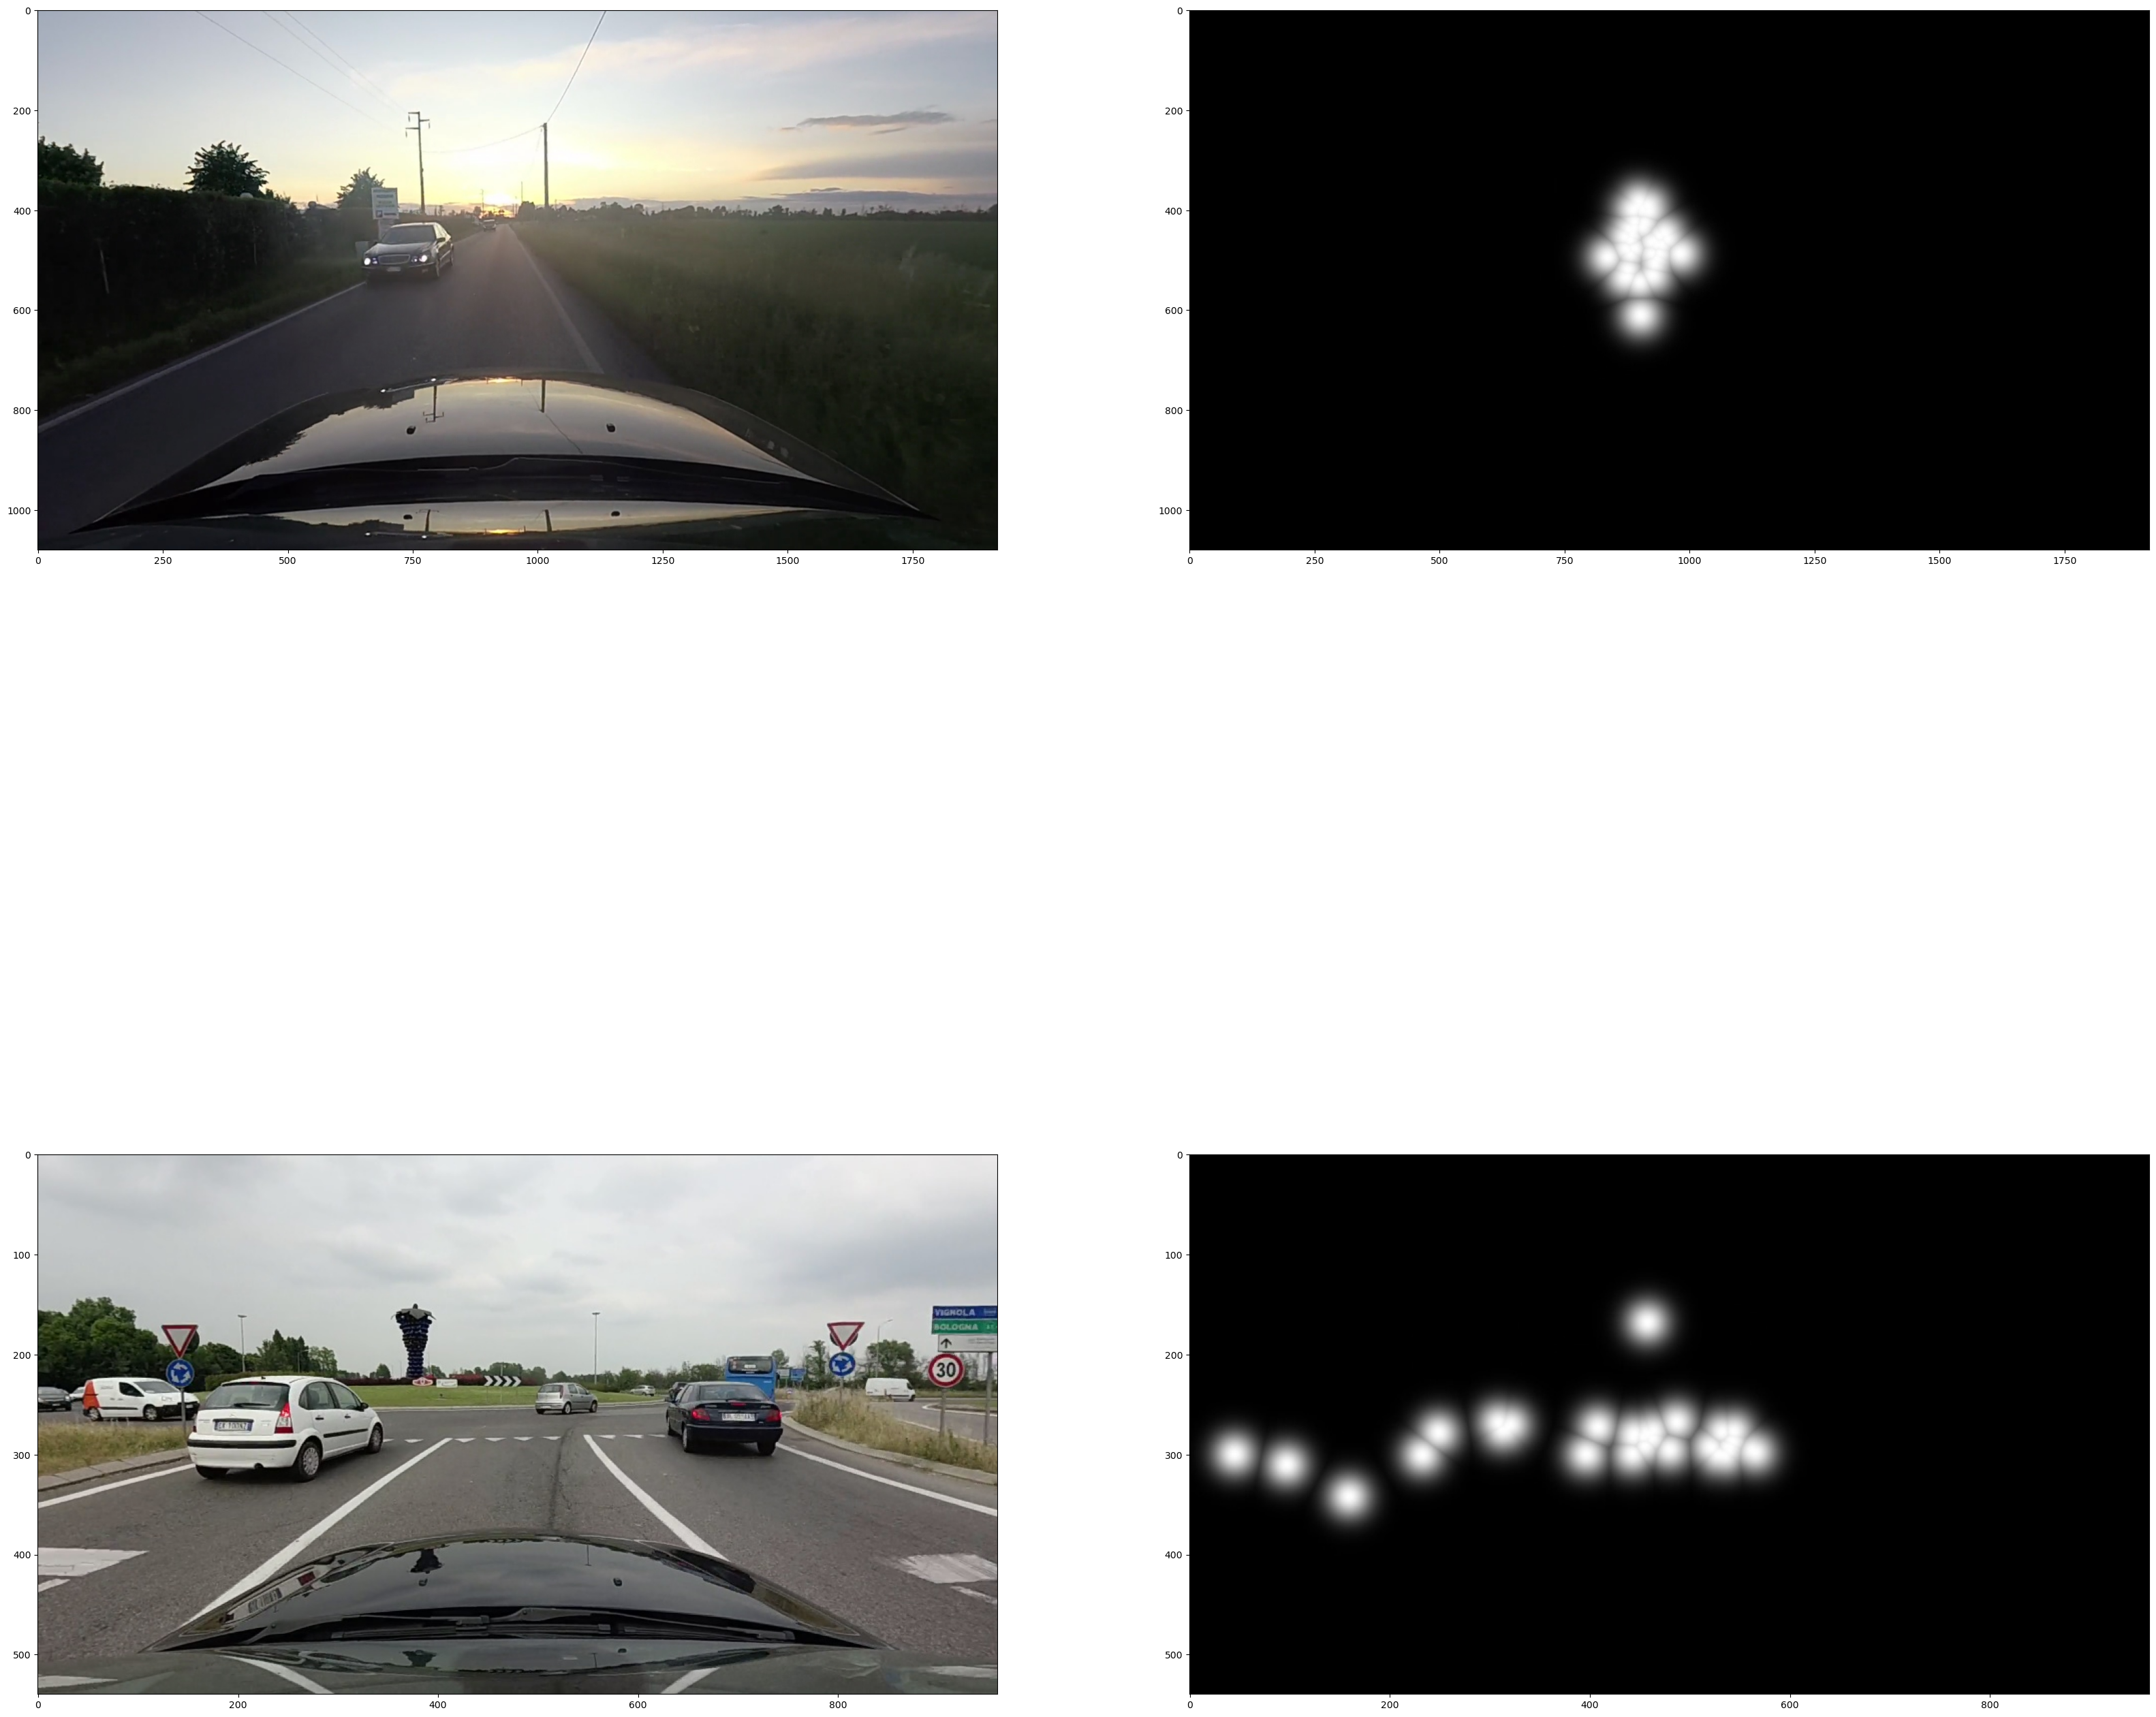

In [79]:
img1 = load_RGB("./../DREYEVE_DATA_OUTPUTS/01/garmin/2050.jpg")
img2 = load_RGB("./../DREYEVE_DATA_OUTPUTS/01/saliency/2050.jpg")
img3 = load_RGB("./../DREYEVE_DATA_OUTPUTS/02/garmin/940.jpg")
img4 = load_RGB("./../DREYEVE_DATA_OUTPUTS/02/saliency/940.jpg")
show_images([img1,img2,img3,img4])

In [15]:
img1 = cv2.resize(img1,dsize = None , fx = 0.5, fy = 0.5)
img2 = cv2.resize(img2,dsize = None , fx = 0.5, fy = 0.5)


In [18]:
r = img1.shape
print(r)
print(img1.dtype)

(540, 960, 3)
uint8


(540, 960)
float64
255 0 255 0 uint8 uint8
255 0


error: OpenCV(4.6.0) /io/opencv/modules/imgproc/src/colormap.cpp:842: error: (-215:Assertion failed) cv::LUT only supports tables of size 256. in function 'applyColorMap'


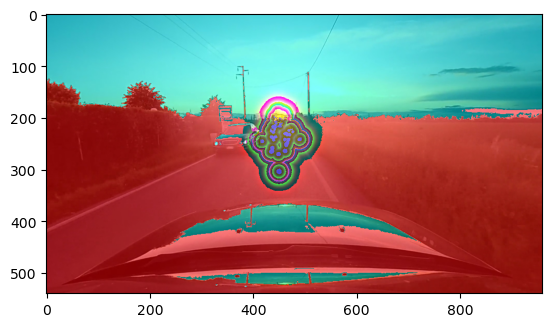

In [44]:
from pytorch_grad_cam.utils.image import show_cam_on_image
gray_img2 = cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY) / 255
print(gray_img2.shape)
print(gray_img2.dtype)
gray_img2 = np.uint8(gray_img2 * 255) 

color = cv2.applyColorMap(gray_img2,cv2.COLORMAP_JET)
print(color.max(),color.min(),img1.max(),img1.min(),color.dtype,img1.dtype)
final = color + img1 
final = final.astype(np.uint8)
plt.imshow(final)
gray_img4 = cv2.cvtColor(img4,cv2.COLOR_RGB2GRAY)
print(gray_img2.max(),gray_img2.min())

j1 = show_cam_on_image(img1,gray_img2,cv2.COLORMAP_JET,0.5)
plt.imshow(j1)

uint8
uint8
uint8
uint8


True

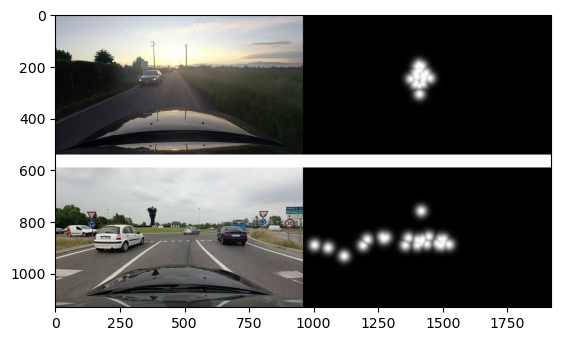

In [50]:
new_image = np.zeros((r[0]*2+50,r[1]*2,3),dtype = np.uint8)
new_image = new_image + 255
print(img1.dtype)
print(img2.dtype)
print(img4.dtype)
print(img3.dtype)
new_image[0:r[0],0:r[1],:] = img1
new_image[r[0]+50:2*r[0]+50,0:r[1],:] = img3
new_image[0:r[0],r[1]:2*r[1],:] = img2
#new_image[0:r[0],2*r[1]:3*r[1],:] = cv2.applyColorMap(img1,cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY),cv2.COLORMAP_JET)
#new_image[r[0]:2*r[0],2*r[1]:3*r[1],:] = cv2.applyColorMap(img3,img4,cv2.COLORMAP_JET)
new_image[r[0]+50:2*r[0]+50,r[1]:2*r[1],:] = img4
plt.imshow(new_image)
cv2.imwrite("./examples/sample1.jpg",cv2.cvtColor(new_image,cv2.COLOR_RGB2BGR))